In [2]:
from ase.dft.kpoints import bandpath, special_points
import numpy as np
from ase.build import bulk
from ase.optimize.bfgs import BFGS
from ase.constraints import UnitCellFilter
from gpaw import GPAW, FermiDirac
from gpaw import PW
from gpaw.xc.libvdwxc import vdw_df
import ase.io.cif
from ase.io import read
from ase.visualize import view
from ase import *
from gpaw import *

# Perform standard ground state calculation (with plane wave basis)
twolayer = Atoms(
    [
    Atom('Mo', ( 0.000057,    1.841899,   14.113579)),
    Atom('S', ( -0.002190,    1.843197,   22.360490 )),
    Atom('S', ( 1.597350,    0.919701,   12.518510)),
    Atom('Mo', ( 1.595103,    0.920999,   20.765421 )),
    Atom('S', ( 1.595403,    0.920826,   15.709325)),
    Atom('S', ( -0.000243,    1.842072,   19.169675)),
    ],
    cell=[(3.190320,    0.000000,    0.000000), (-1.595160,    2.762898,    0.000000), (0.000000,    0.000000,   34.879000)],
    pbc=[True,True,True],
    )

calc = GPAW(mode=PW(600),
            xc=vdw_df(),
            kpts=(12, 12, 1),
            occupations=FermiDirac(0.001),
            )

twolayer.set_calculator(calc)

twolayer.get_potential_energy()

calc.write('mos2_mos2_gs.gpw')




  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.1
 |___|_|             

User:   natasha@natasha-UX330UAR
Date:   Mon Jan 20 20:12:51 2020
Arch:   x86_64
Pid:    2423
Python: 3.7.2
gpaw:   /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/gpaw
_gpaw:  /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/ase (version 3.17.0)
numpy:  /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/numpy (version 1.16.2)
scipy:  /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: [12 12  1]
  mode: {ecut: 600.0,
         gammacentered: False,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.001}
  xc: {backend: libvdwxc,
       libvdwxc_name: vdW-DF,
       name: vdW-DF,
       semiloca

In [1]:
from ase.dft.kpoints import bandpath, special_points
import numpy as np
from ase.build import bulk
from ase.optimize.bfgs import BFGS
from ase.constraints import UnitCellFilter
from gpaw import GPAW, FermiDirac
from gpaw import PW
from gpaw.xc.libvdwxc import vdw_df
import ase.io.cif
from ase.io import read
from ase.visualize import view
from ase import *
from gpaw import *

G = [0, 0, 0]
K = [1 / 3., 1 / 3., 0]
M = [0.5, 0, 0]

#kpts, x, X = bandpath([G, K, M, G], npoints=1000)

calc = GPAW('mos2_mos2_gs.gpw',
            fixdensity=True,
            symmetry='off',
            kpts={'path': 'GKMG', 'npoints': 200},
            )

calc.get_potential_energy()



  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.1
 |___|_|             

User:   natasha@natasha-UX330UAR
Date:   Tue Jan 21 13:18:30 2020
Arch:   x86_64
Pid:    2384
Python: 3.7.2
gpaw:   /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/gpaw
_gpaw:  /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/ase (version 3.17.0)
numpy:  /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/numpy (version 1.16.2)
scipy:  /home/natasha/anaconda3/envs/mypy3/lib/python3.7/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Reading from mos2_mos2_gs.gpw
Read dipole, energy, free_energy
Reading input parameters:
  kpts: [12 12  1]
  mode: {ecut: 600.0,
         gammacentered: False,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.001}
  xc: {backend: libvd

-195.91422037101322

In [2]:
calc.write('mos2_mos2_bands_new.gpw')

bs = calc.band_structure()
bs.plot(filename='bandstructure_mos2_mos2_new.png', show=True, emax=10.0)

Writing to mos2_mos2_bands_new.gpw (mode='')



<Figure size 640x480 with 1 Axes>

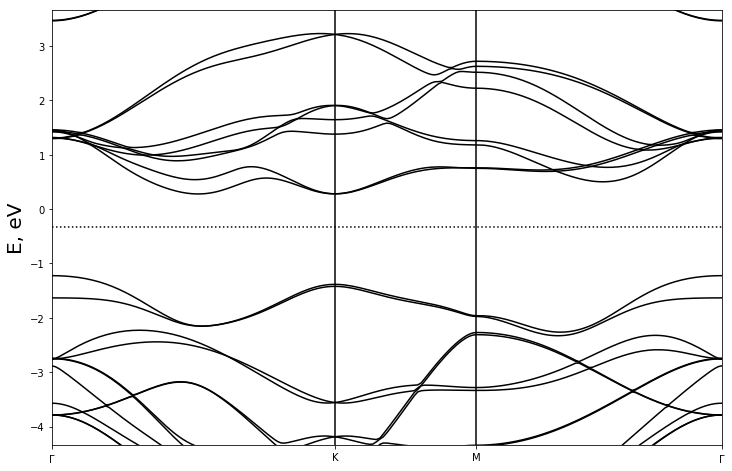

In [4]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
bs.plot( ax=ax, filename='bandstructure_mos2_mos2.png',colors='Blue', emin=-4, emax=4, ylabel='E, eV')
ax.set_ylabel('E, eV', fontsize=20)
for line in ax.get_lines():
    line.set_color("black")
plt.savefig('bands.png')